# **Welcome to Capstone Project ( Covid 19 )**

In [ ]:
# Import the required libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import warnings
warnings.filterwarnings("ignore")
from prophet import Prophet

In [ ]:
# Import the required dataset
df = pd.read_csv(r'D:\Intellipaat\Datasets\Covid_19.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [171]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


Here, the column names are little messy so we rename them to simple ones.

In [ ]:
# Renaming the columns
df.rename(columns={'Province/State' : 'state', 
                   'Country/Region' : 'country', 
                   'Lat' : 'lat', 
                   'Long' : 'long',
                   'Date' : 'date', 
                   'Confirmed' : 'confirmed', 
                   'Deaths' : 'death', 
                   'Recovered' : 'recovered', 
                   'Active' : 'active', 
                   'WHO Region' : 'WHO'}, inplace=True)

df

In [174]:
# Total active cases 
df['active'].sum()

396715350

In [ ]:
# Group by the records with respect to country
world = df.groupby('country').sum()[['confirmed', 'death', 'recovered', 'active']].reset_index()
world

,country,confirmed,death,recovered,active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [176]:
# Countries with active cases
fig = pe.choropleth(world, locations='country', 
                    locationmode='country names', 
                    color='active', 
                    hover_name='country', 
                    range_color=[1, 100000], 
                    color_continuous_scale='Peach', 
                    title='Countries with active cases')
fig.show()

In [177]:
# Countries with recovered cases
fig = pe.choropleth(world, locations='country', 
                    locationmode='country names', 
                    color='recovered', 
                    hover_name='country', 
                    range_color=[1, 100000], 
                    color_continuous_scale='greens', 
                    title='Countries with recovered cases')
fig.show()

In [178]:
# Countries with death cases
fig = pe.choropleth(world, locations='country', 
                    locationmode='country names', 
                    color='death', 
                    hover_name='country', 
                    range_color=[1, 20000], 
                    color_continuous_scale='blues', 
                    title='Countries with death cases')
fig.show()

### Analyze the trend of cases

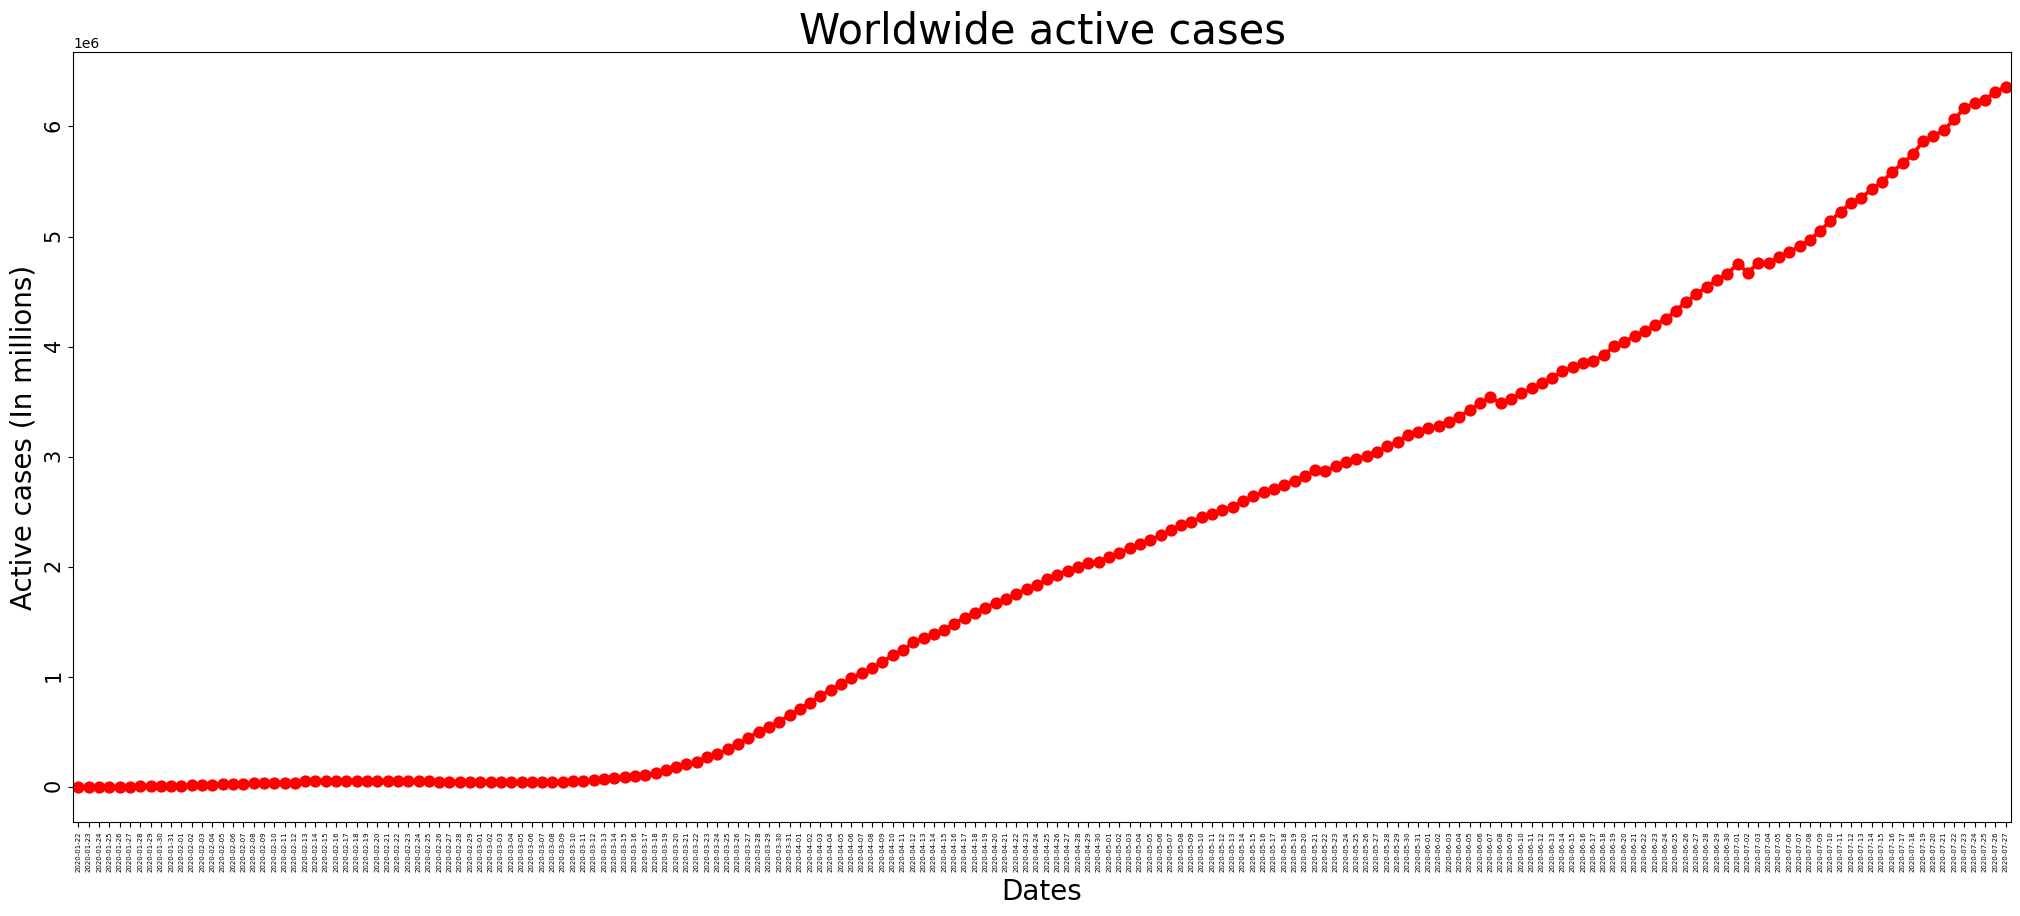

In [179]:
# Analyze the trend in active cases
total_cases = df.groupby("date")[['active']].sum().reset_index()
total_cases

plt.figure(figsize=(25, 10))
plt.xticks(rotation=90, fontsize=5)
plt.yticks(rotation=90, fontsize=15)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Active cases (In millions)', fontsize=20)
plt.title('Worldwide active cases', fontsize=30)
sns.pointplot(x=total_cases.date, y=total_cases.active, color='red')
plt.show()

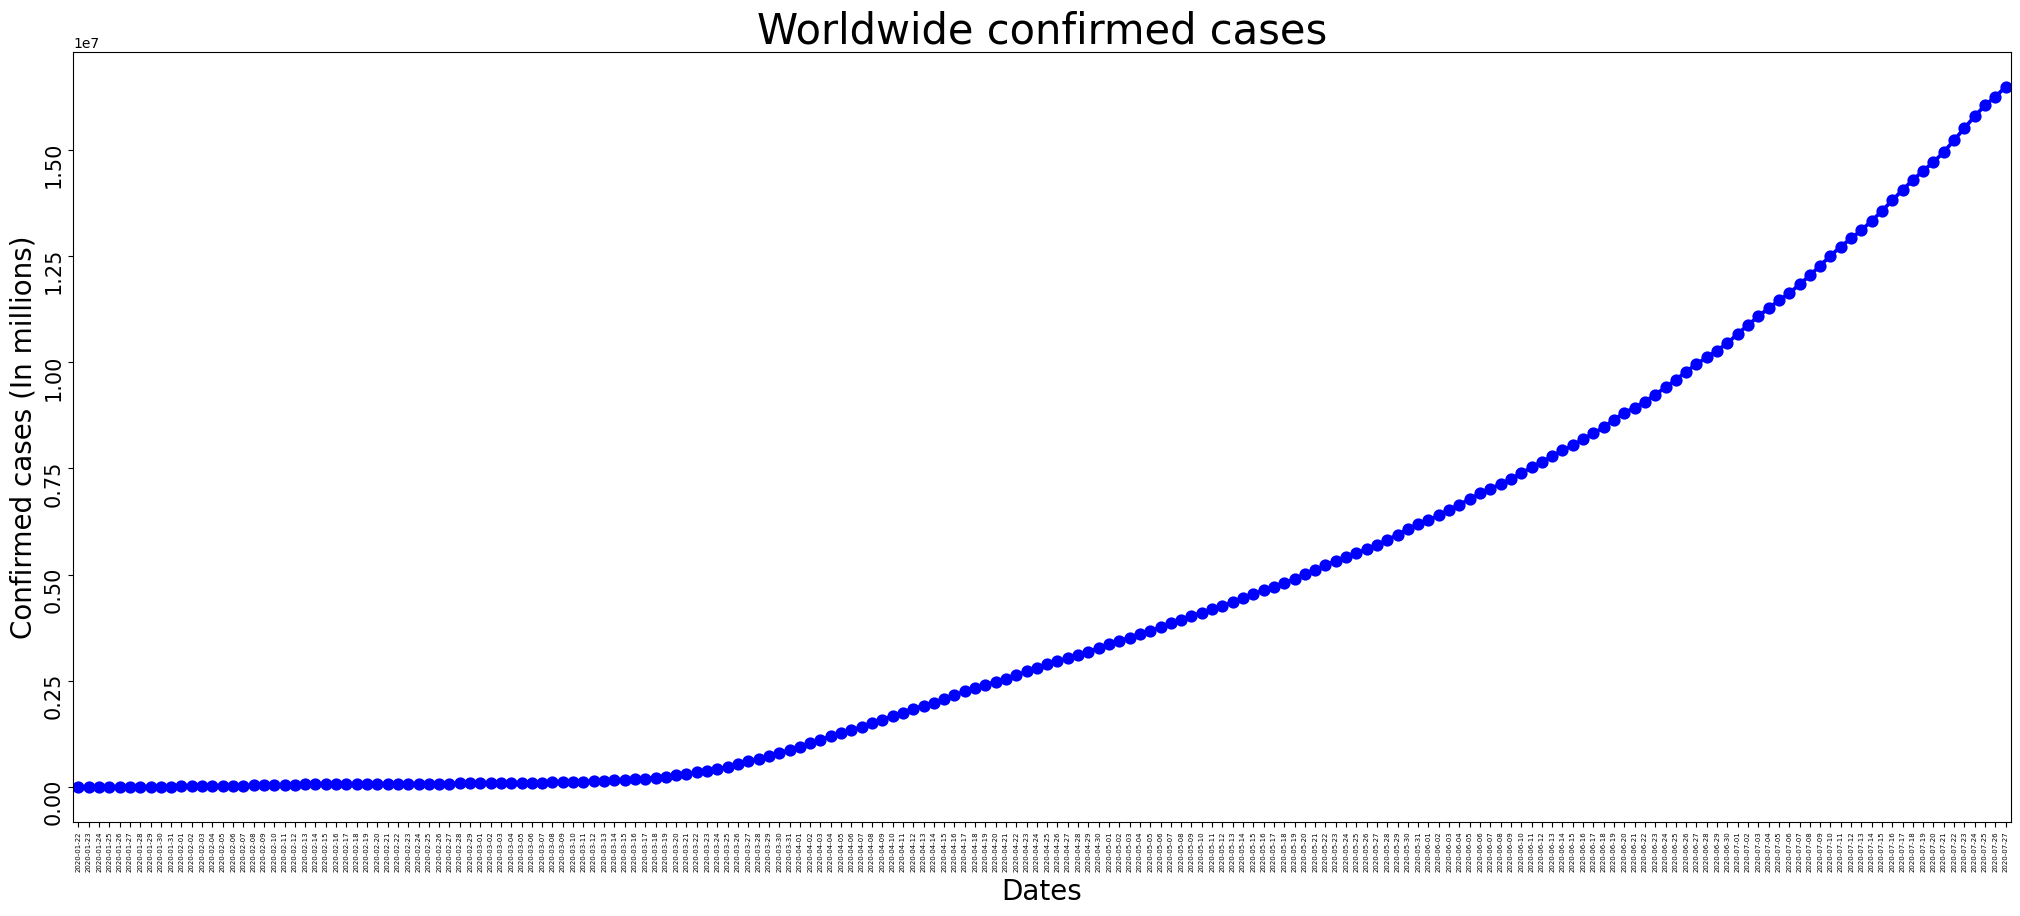

In [180]:
# Analyze the trend in confirmed cases
confirmed_cases = df.groupby('date')['confirmed'].sum().reset_index()
confirmed_cases

plt.figure(figsize=(25, 10))
plt.xticks(rotation=90, fontsize=5)
plt.yticks(rotation=90, fontsize=15)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Confirmed cases (In millions)', fontsize=20)
plt.title('Worldwide confirmed cases', fontsize=30)
sns.pointplot(x=confirmed_cases.date, y=confirmed_cases.confirmed, color='blue')
plt.show()


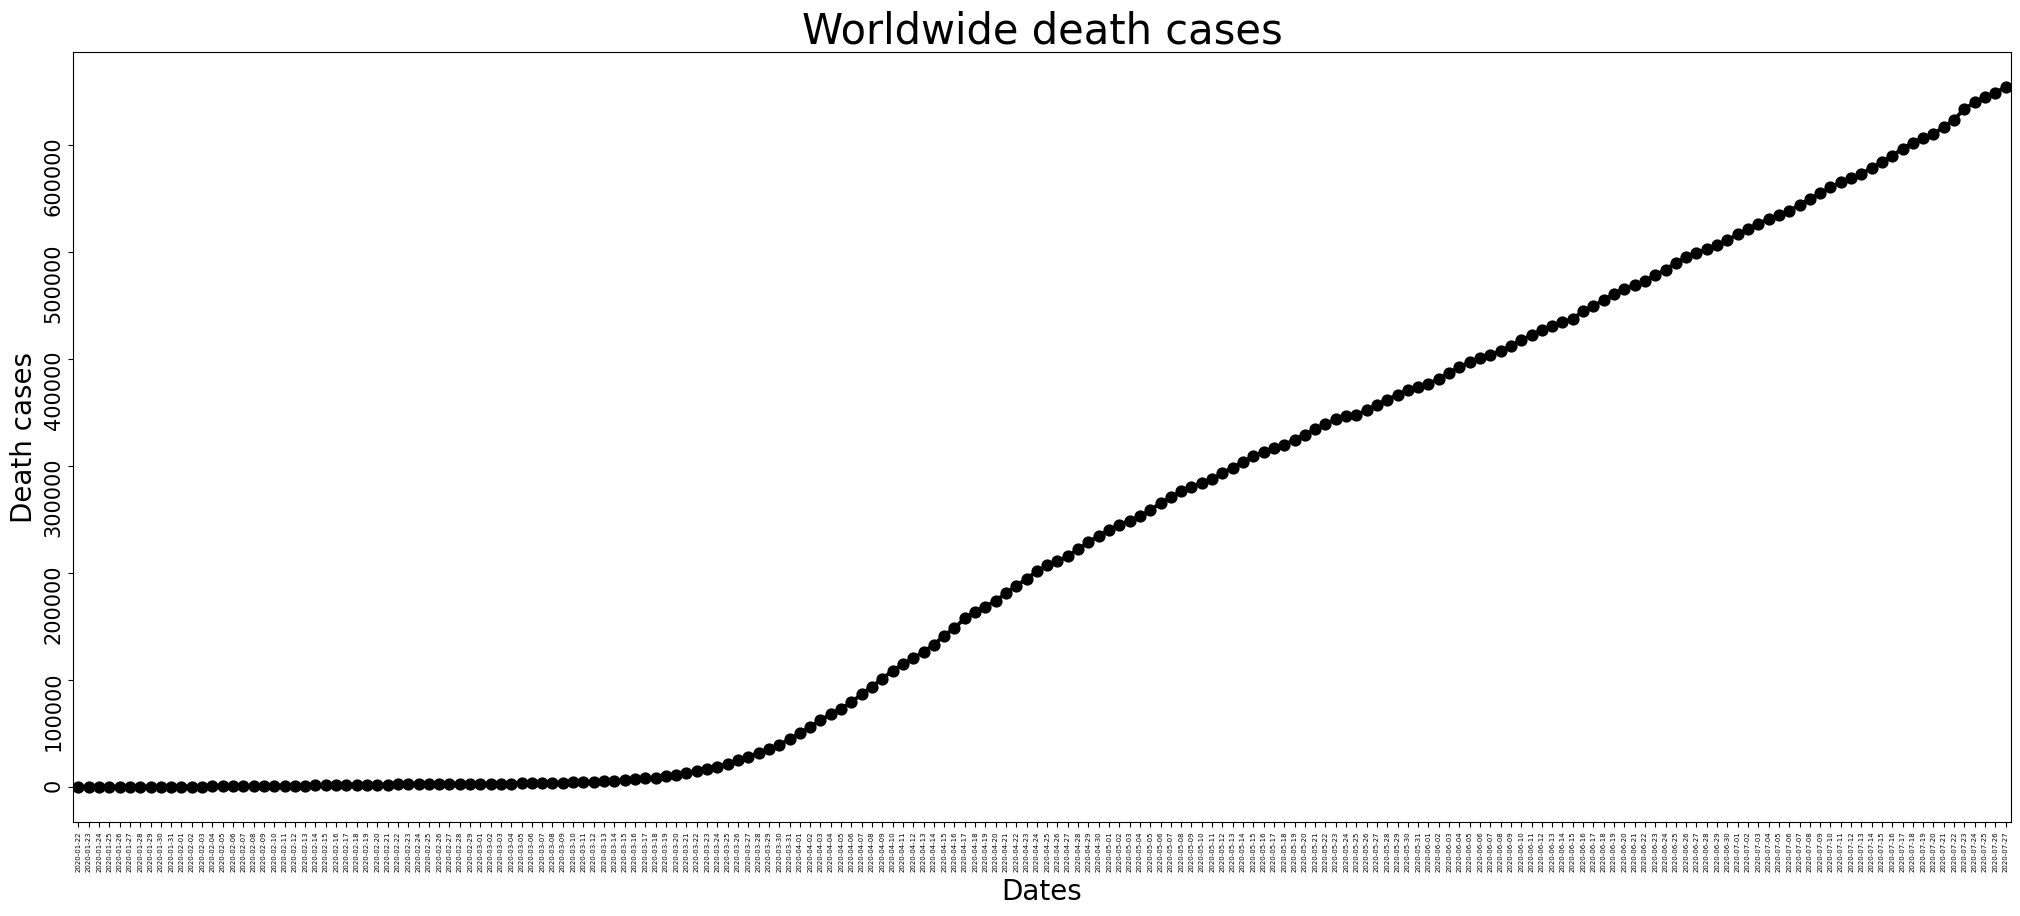

In [181]:
# Analyze the trend in death cases
death_cases = df.groupby('date')['death'].sum().reset_index()
death_cases

plt.figure(figsize=(25, 10))
plt.xticks(rotation=90, fontsize=5)
plt.yticks(rotation=90, fontsize=15)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Death cases', fontsize=20)
plt.title('Worldwide death cases', fontsize=30)
sns.pointplot(x=death_cases.date, y=death_cases.death, color='black')
plt.show()

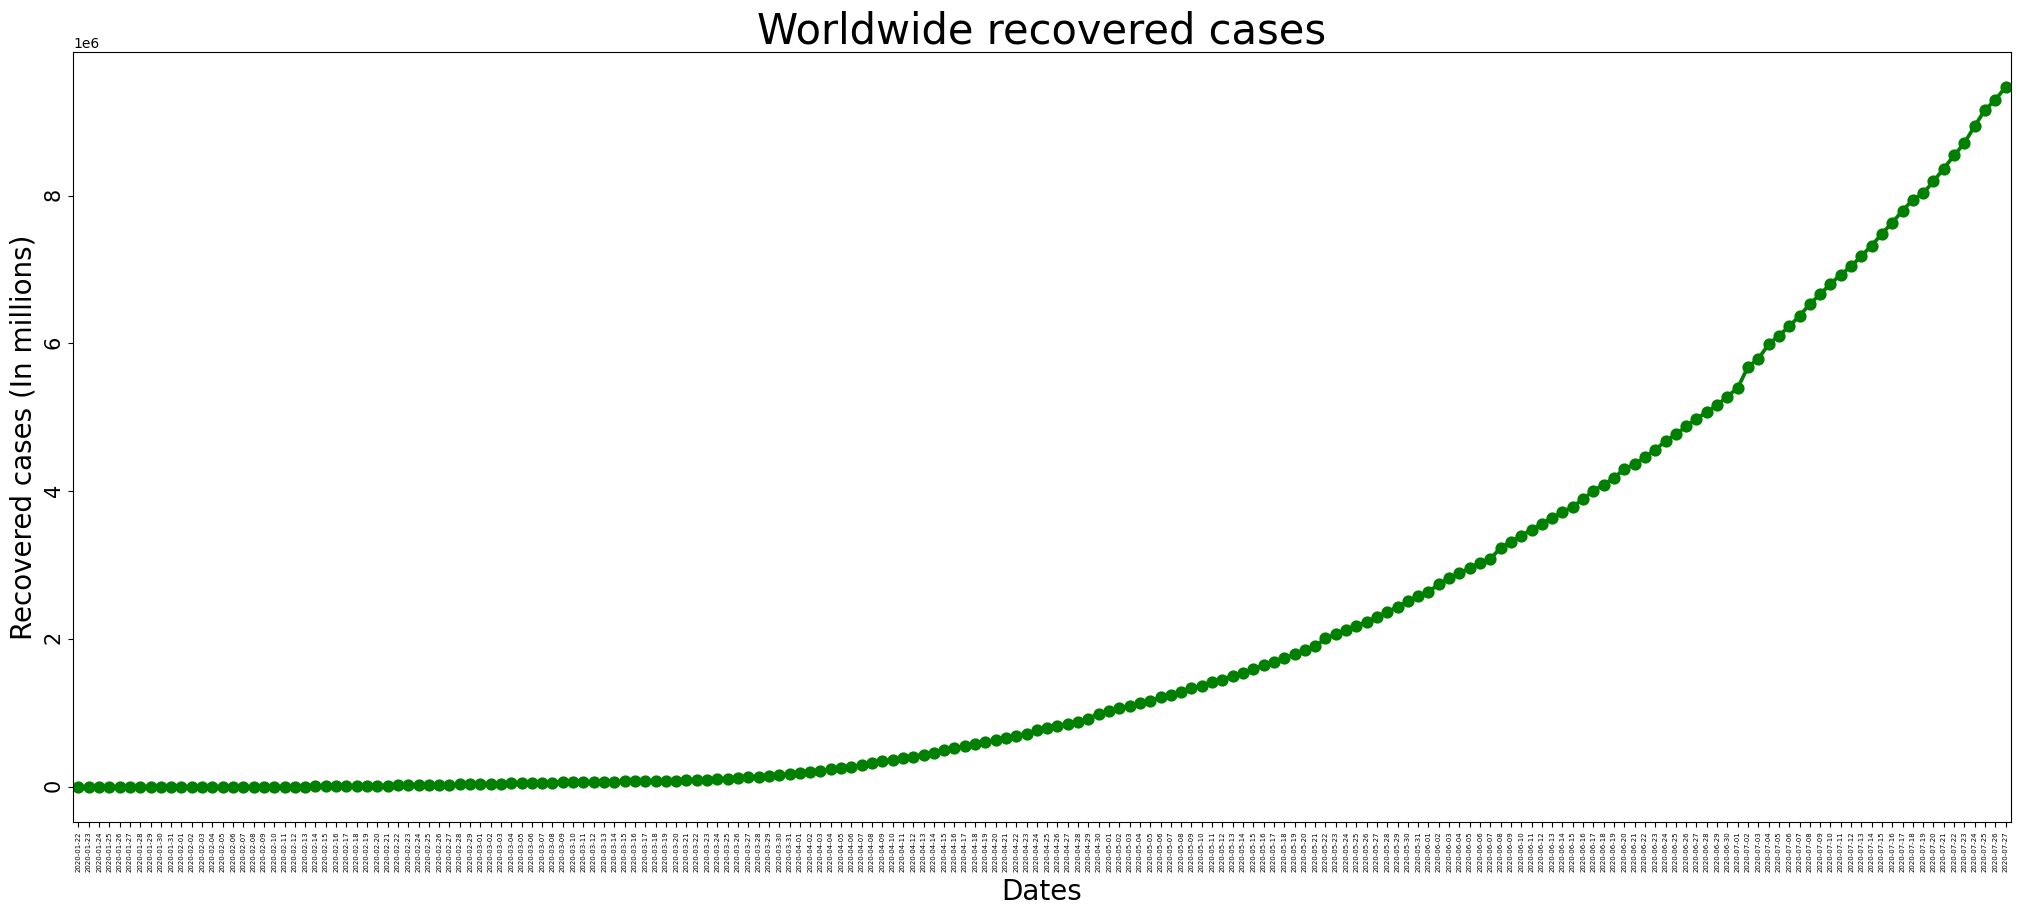

In [182]:
# Analyze the trend in recovered cases
recovered_cases = df.groupby('date')['recovered'].sum().reset_index()
recovered_cases

plt.figure(figsize=(25, 10))
plt.xticks(rotation=90, fontsize=5)
plt.yticks(rotation=90, fontsize=15)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Recovered cases (In millions)', fontsize=20)
plt.title('Worldwide recovered cases', fontsize=30)
sns.pointplot(x=recovered_cases.date, y=recovered_cases.recovered, color='green')
plt.show()

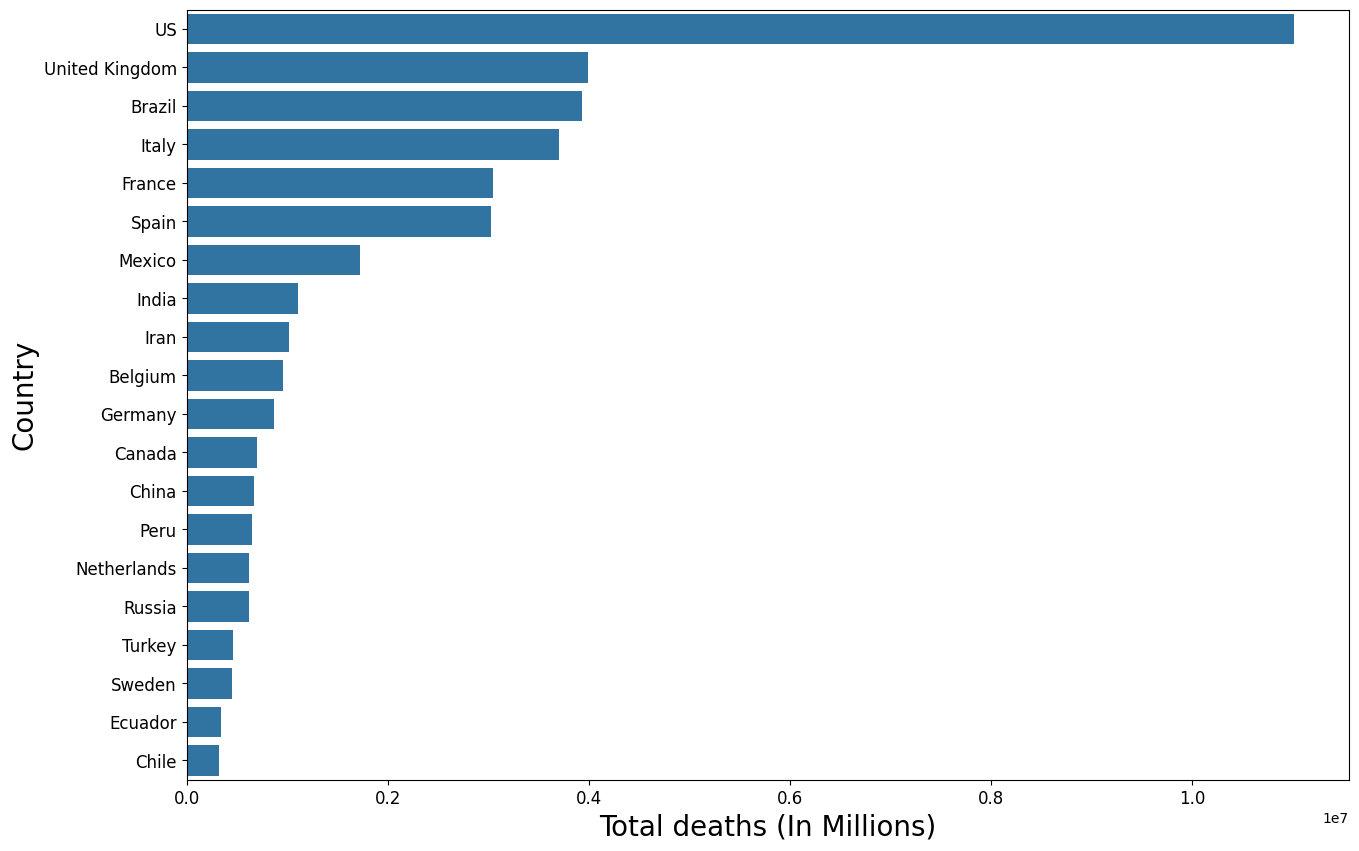

In [183]:
# Top 20 countries having most death cases
top_deaths = df.groupby('country')['death'].sum().sort_values(ascending=False).head(20).reset_index()

plt.figure(figsize=(15, 10))
plt.xlabel('Total deaths (In Millions)', fontsize=20)
plt.ylabel('Country', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.barplot(x=top_deaths.death, y=top_deaths.country)
plt.show()

In [184]:
# Analyze the top 5 countries
US = df[df['country'] == 'US']
US = US.groupby(by='date')[['confirmed', 'death', 'recovered', 'active']].sum().reset_index()

Brazil = df[df['country'] == 'Brazil']
Brazil = Brazil.groupby(by='date')[['confirmed', 'death', 'recovered', 'active']].sum().reset_index()

Russia = df[df['country'] == 'Russia']
Russia = Russia.groupby(by='date')[['confirmed', 'death', 'recovered', 'active']].sum().reset_index()

India = df[df['country'] == 'India']
India = India.groupby(by='date')[['confirmed', 'death', 'recovered', 'active']].sum().reset_index()

Spain = df[df['country'] == 'Spain']
Spain = Spain.groupby(by='date')[['confirmed', 'death', 'recovered', 'active']].sum().reset_index()

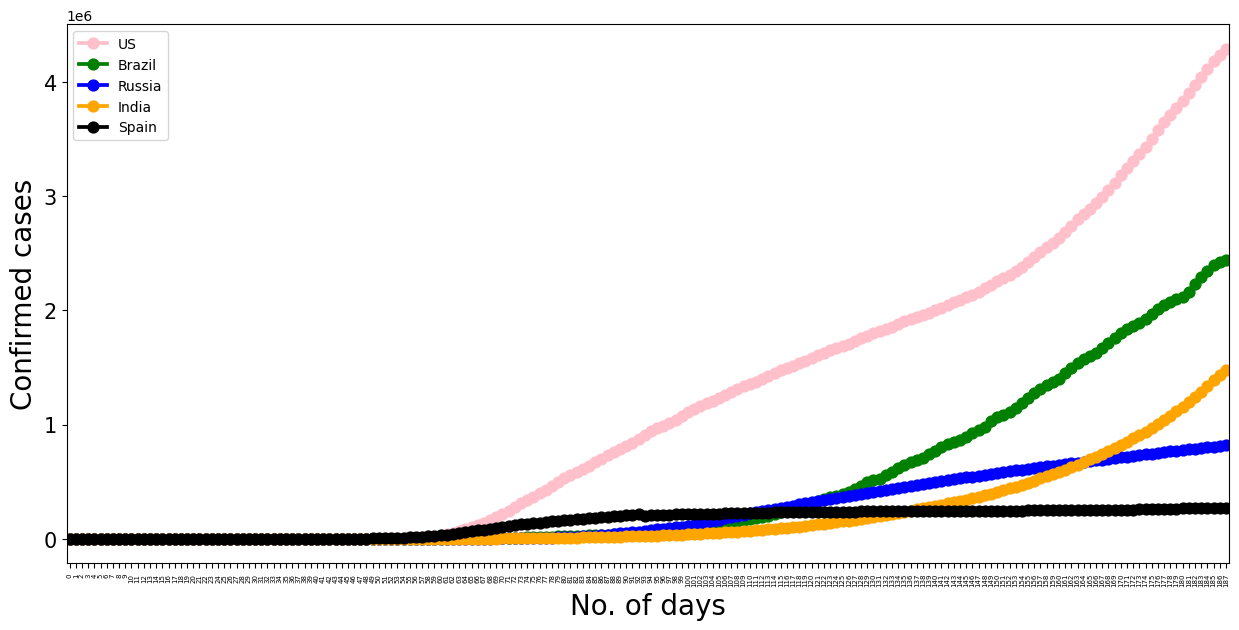

In [185]:
# plot the confirmed data of these 5 countries
plt.figure(figsize=(15, 7))
plt.xticks(rotation=90, fontsize=5)
plt.yticks(fontsize=15)
plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed cases', fontsize=20)
sns.pointplot(data=US, x=US.index, y='confirmed', color='pink', label='US')
sns.pointplot(data=Brazil, x=Brazil.index, y='confirmed', color='green', label='Brazil')
sns.pointplot(data=Russia, x=Russia.index, y='confirmed', color='blue', label='Russia')
sns.pointplot(data=India, x=India.index, y='confirmed', color='orange', label='India')
sns.pointplot(data=Spain, x=Spain.index, y='confirmed', color='black', label='Spain')
plt.legend()
plt.show()

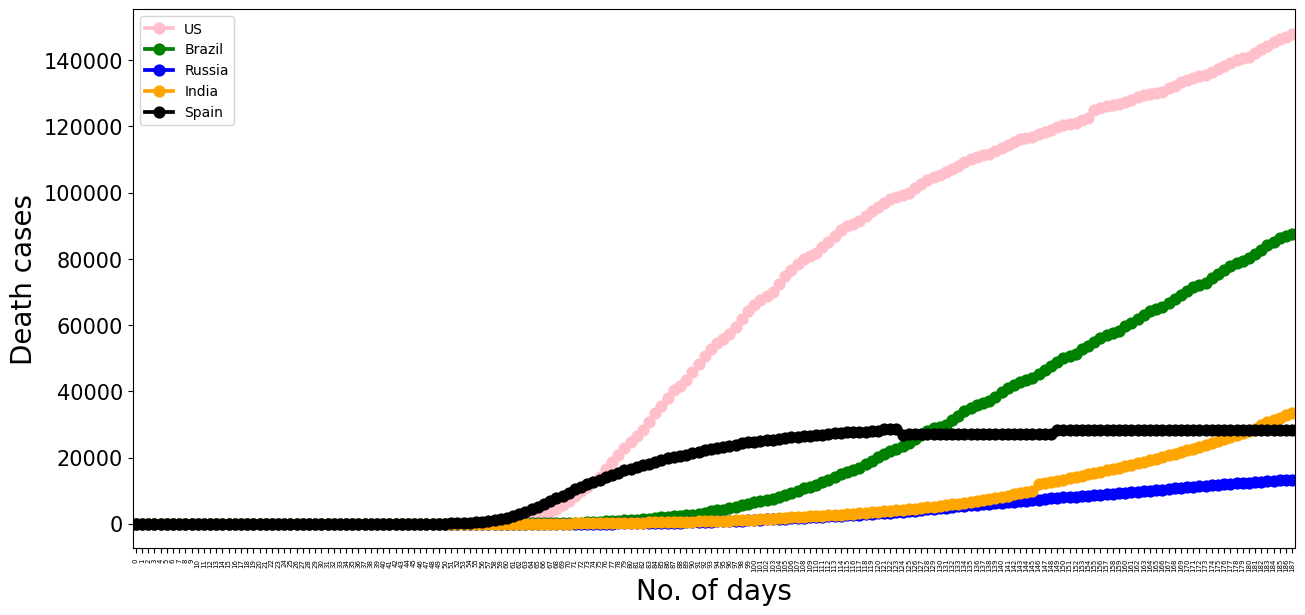

In [186]:
# plot the death data of these 5 countries
plt.figure(figsize=(15, 7))
plt.xticks(rotation=90, fontsize=5)
plt.yticks(fontsize=15)
plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Death cases', fontsize=20)
sns.pointplot(data=US, x=US.index, y='death', color='pink', label='US')
sns.pointplot(data=Brazil, x=Brazil.index, y='death', color='green', label='Brazil')
sns.pointplot(data=Russia, x=Russia.index, y='death', color='blue', label='Russia')
sns.pointplot(data=India, x=India.index, y='death', color='orange', label='India')
sns.pointplot(data=Spain, x=Spain.index, y='death', color='black', label='Spain')
plt.legend()
plt.show()

### Forecasting using prophet

In [ ]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      14664 non-null  object 
 1   country    49068 non-null  object 
 2   lat        49068 non-null  float64
 3   long       49068 non-null  float64
 4   date       49068 non-null  object 
 5   confirmed  49068 non-null  int64  
 6   death      49068 non-null  int64  
 7   recovered  49068 non-null  int64  
 8   active     49068 non-null  int64  
 9   WHO        49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
# Convert the datetype of date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

In [191]:
# for building a forecasting model using fbprophet library
# there should be only 2 columns passed
# the column names should always be --> 'ds' & 'y'

# 'ds' is date/month/year (datetime) data
# 'y' is target column, means which you're forecasting

### Forecaste on confirmed cases

In [ ]:
# Initialize date as ds & confirmed as y(subject)
confirmed = confirmed_cases.rename(columns={'date' : 'ds', 
                                            'confirmed' : 'y'})

In [193]:
con_model = Prophet(interval_width=0.95)

In [ ]:
# Train the model
con_model.fit(confirmed)

20:09:59 - cmdstanpy - INFO - Chain [1] start processing


20:09:59 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Set the forecasting limit to 7 days
con_future = con_model.make_future_dataframe(periods=7)
con_future

In [ ]:
# Forecast the data
con_forecast = con_model.predict(con_future)
con_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632401e+07,1.616620e+07,1.647243e+07
189,2020-07-29,1.653405e+07,1.637845e+07,1.669888e+07
190,2020-07-30,1.674820e+07,1.659630e+07,1.690194e+07
191,2020-07-31,1.696362e+07,1.679247e+07,1.714251e+07
192,2020-08-01,1.717143e+07,1.700463e+07,1.734349e+07
193,2020-08-02,1.736922e+07,1.719770e+07,1.754793e+07
194,2020-08-03,1.756410e+07,1.738504e+07,1.775877e+07


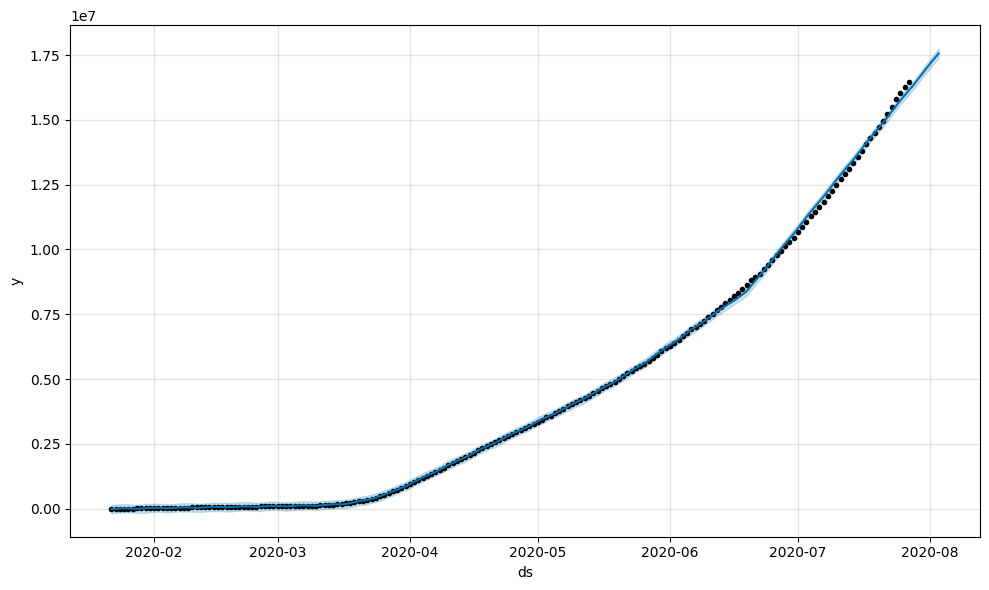

In [ ]:
# Plot the forecasted data with original data
con_plot=con_model.plot(con_forecast)

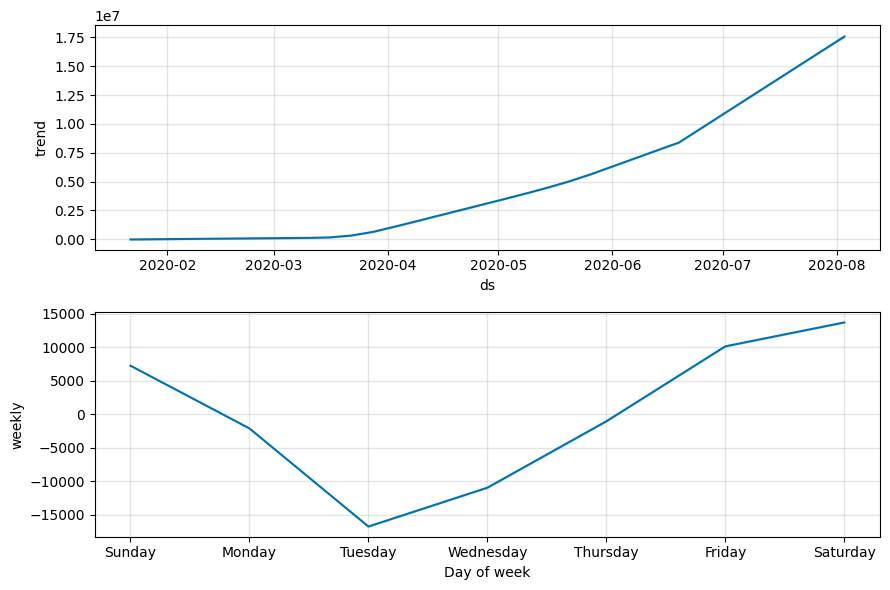

In [ ]:
# Plot the components of model
con_comp = con_model.plot_components(con_forecast)

### Forecaste on death cases

In [ ]:
# # Initialize date as ds & confirmed as y(subject)
death = death_cases.rename(columns={'date' : 'ds', 
                                    'death' : 'y'})
death

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [201]:
death_model = Prophet(interval_width=0.95)

In [ ]:
# Train the model
death_model.fit(death)

20:14:26 - cmdstanpy - INFO - Chain [1] start processing
20:14:26 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Set the forecast limit to 7 days
death_future = death_model.make_future_dataframe(periods=7)
death_future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
# Forecast the data
death_forecast = death_model.predict(death_future)
death_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,652342.857217,649406.251567,655595.590055
189,2020-07-29,657910.776693,654784.350204,660848.850214
190,2020-07-30,663521.743356,660492.727092,666840.153711
191,2020-07-31,669038.962960,665756.809378,672898.951796
192,2020-08-01,673922.465056,669711.780705,678522.035283
193,2020-08-02,678060.469456,673285.338555,682811.757946
194,2020-08-03,682351.854619,676913.540630,688510.615682


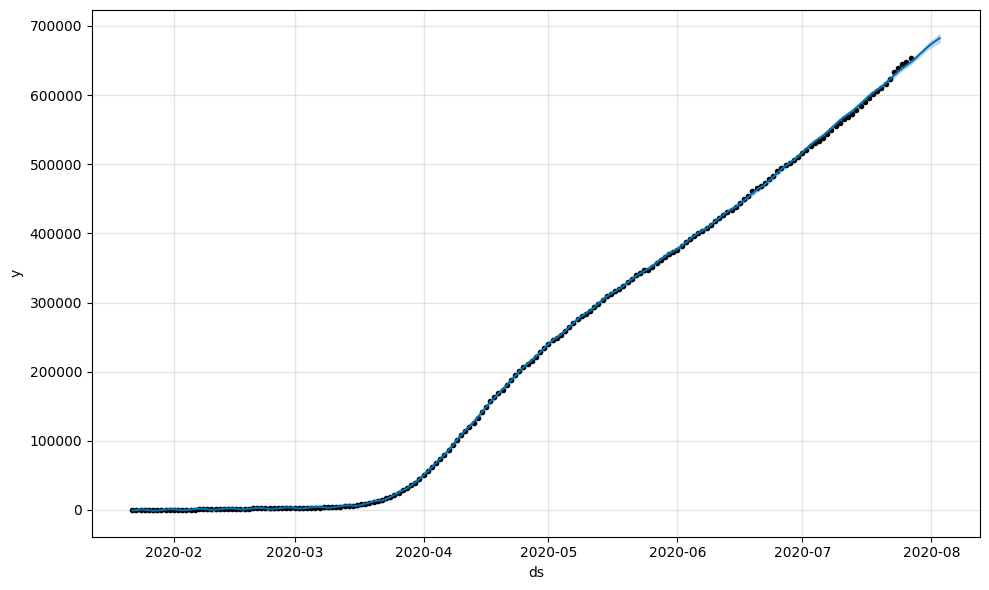

In [ ]:
# Plot the forecasted data with original data
death_plot = death_model.plot(death_forecast)

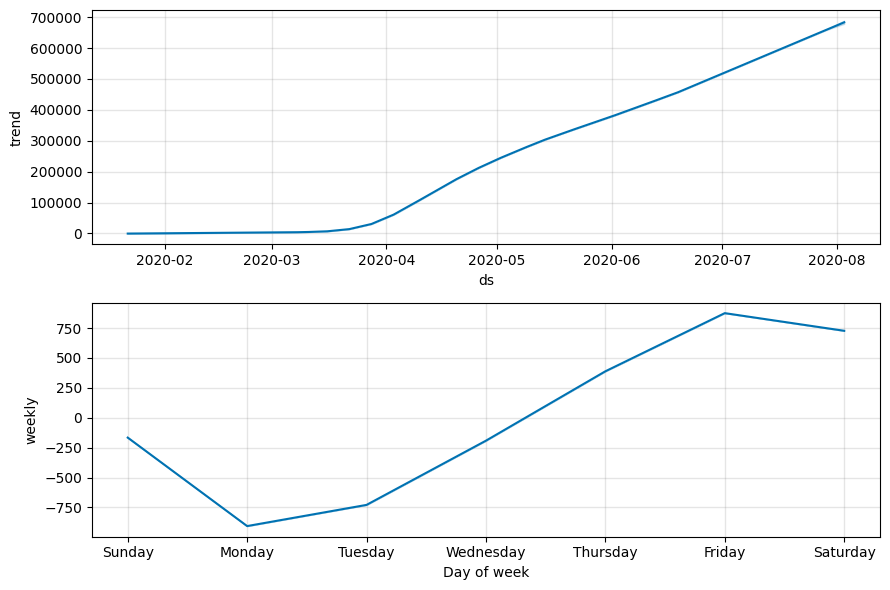

In [ ]:
# plot the components of model
death_com = death_model.plot_components(death_forecast)

### Forecaste on recovered cases

In [ ]:
# # Initialize date as ds & confirmed as y(subject)
recovered = recovered_cases.rename(columns={'date' : 'ds', 
                                            'recovered' : 'y'})
recovered

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [209]:
rec_model = Prophet(interval_width=0.95)

In [ ]:
# Train the model
rec_model.fit(death)

20:21:56 - cmdstanpy - INFO - Chain [1] start processing
20:21:56 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Set the forecast limit to 7 days
rec_future = rec_model.make_future_dataframe(periods=7)
rec_future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
# Forecast the data
rec_forecast = rec_model.predict(rec_future)
rec_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,652342.857217,649383.973159,655529.838633
189,2020-07-29,657910.776693,654972.355583,661099.809322
190,2020-07-30,663521.743356,660551.292475,666551.773018
191,2020-07-31,669038.962960,664872.349324,672598.749190
192,2020-08-01,673922.465056,669991.804348,677638.906302
193,2020-08-02,678060.469456,673203.405243,682478.406846
194,2020-08-03,682351.854619,676462.057338,687245.250615


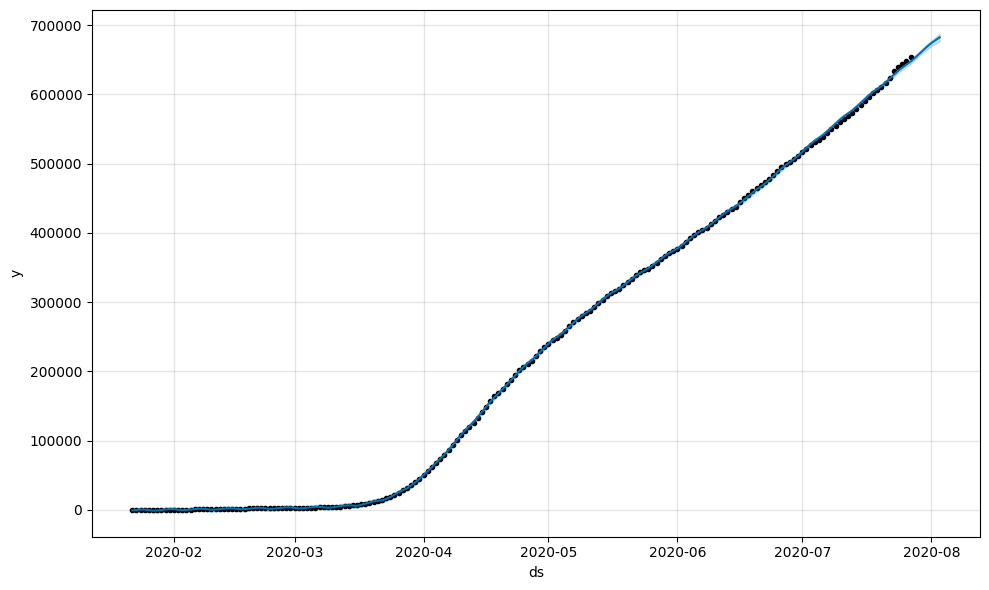

In [ ]:
# Plot the forecasted data with original data
ec_plot = rec_model.plot(rec_forecast)

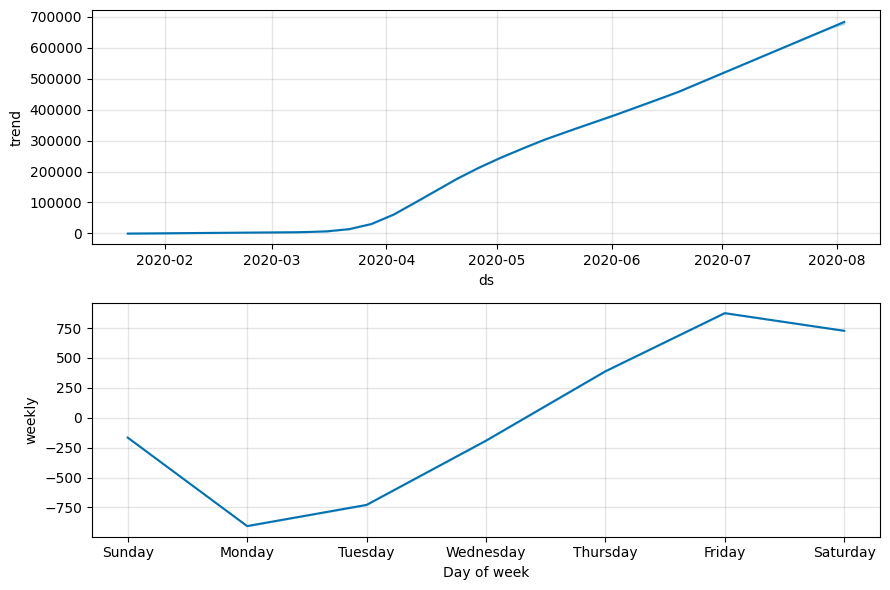

In [ ]:
# Plot the components of model
rec_comp = rec_model.plot_components(rec_forecast)

### Forecaste on active cases

In [ ]:
# Initialize data as ds & confirmed as y(subject)
active = active_cases.rename(columns={'date' : 'ds', 
                                      'active' : 'y'})

In [222]:
act_model = Prophet(interval_width=0.95)

In [ ]:
# Train the model
act_model.fit(active)

20:35:08 - cmdstanpy - INFO - Chain [1] start processing
20:35:08 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Set the forecast limit to 7 days
act_future = act_model.make_future_dataframe(periods=7)
act_future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
# Forecast the data
act_forecast = act_model.predict(act_future)
act_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,6.353204e+06,6.282487e+06,6.425748e+06
189,2020-07-29,6.415552e+06,6.349644e+06,6.492507e+06
190,2020-07-30,6.481007e+06,6.410280e+06,6.553272e+06
191,2020-07-31,6.549045e+06,6.476882e+06,6.621121e+06
192,2020-08-01,6.611208e+06,6.541826e+06,6.681326e+06
193,2020-08-02,6.678514e+06,6.601862e+06,6.760676e+06
194,2020-08-03,6.732249e+06,6.648743e+06,6.808263e+06


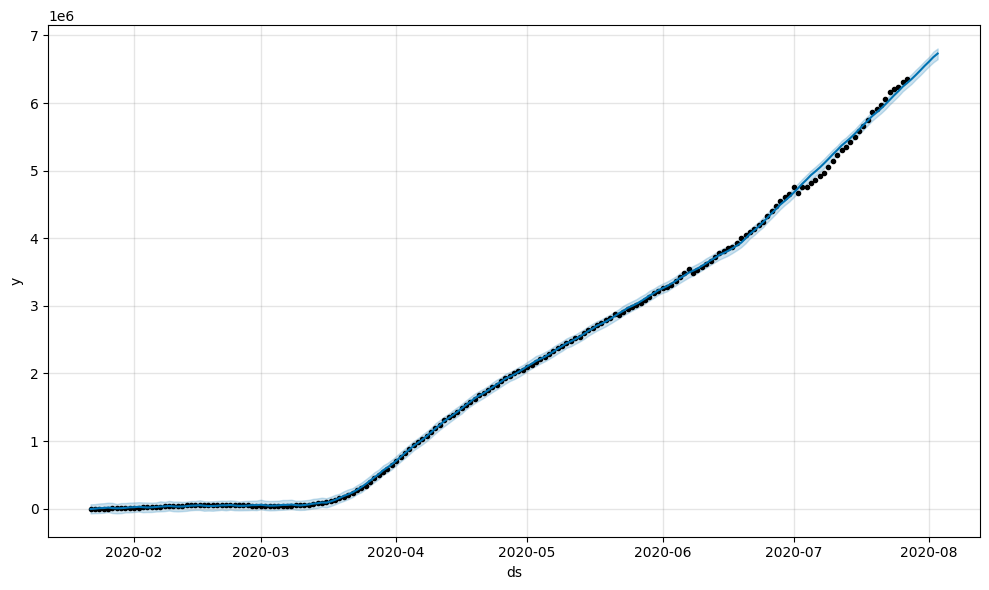

In [ ]:
# plot the forecasted data with original data
act_plot = act_model.plot(act_forecast)

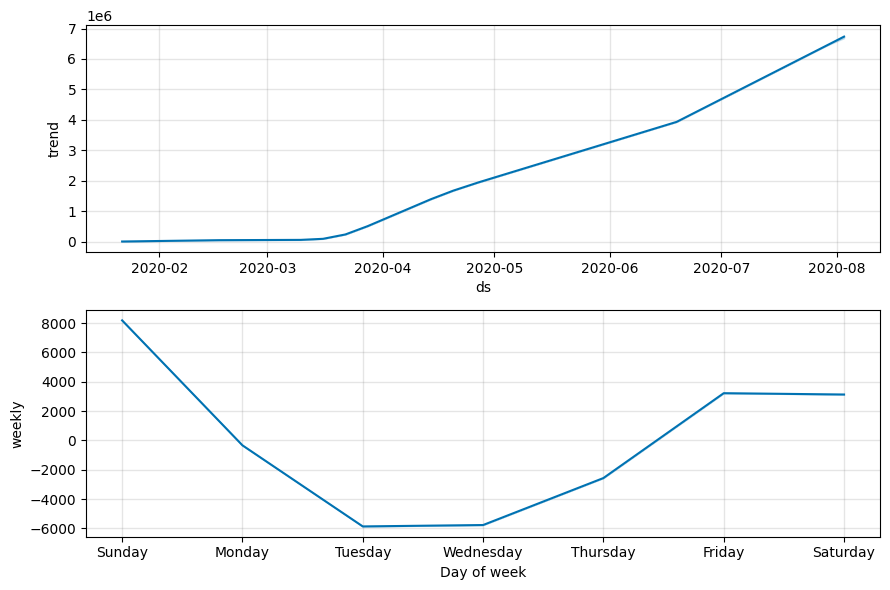

In [ ]:
# Plot the components of model
act_comp = act_model.plot_components(act_forecast)

END

---